# Homewrok 2
## A/B Testing
### Maria Petrosyan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scenario

### You have four advertisement options (bandits), and your task is to design an experiment using Epsilon Greedy and Thompson Sampling.

## Design of Experiment

### A bandit class has already been created for you. It is an abstract class with abstract methods. You must not exclude anything from the Bandit() class. However, you can add more stuff if you need.

Bandit_Reward=[1,2,3,4]

NumberOfTrials: 20000

In [9]:
bandit_rewards_list = [1,2,3,4]
num_trials = 20000

### 1. Create a Bandit Class

### 2. Create EpsilonGreedy() and ThompsonSampling() classes and methods (inherited
### from Bandit()).

### 3. Report

In [11]:
from Bandit import Bandit
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

DataFrame initialized


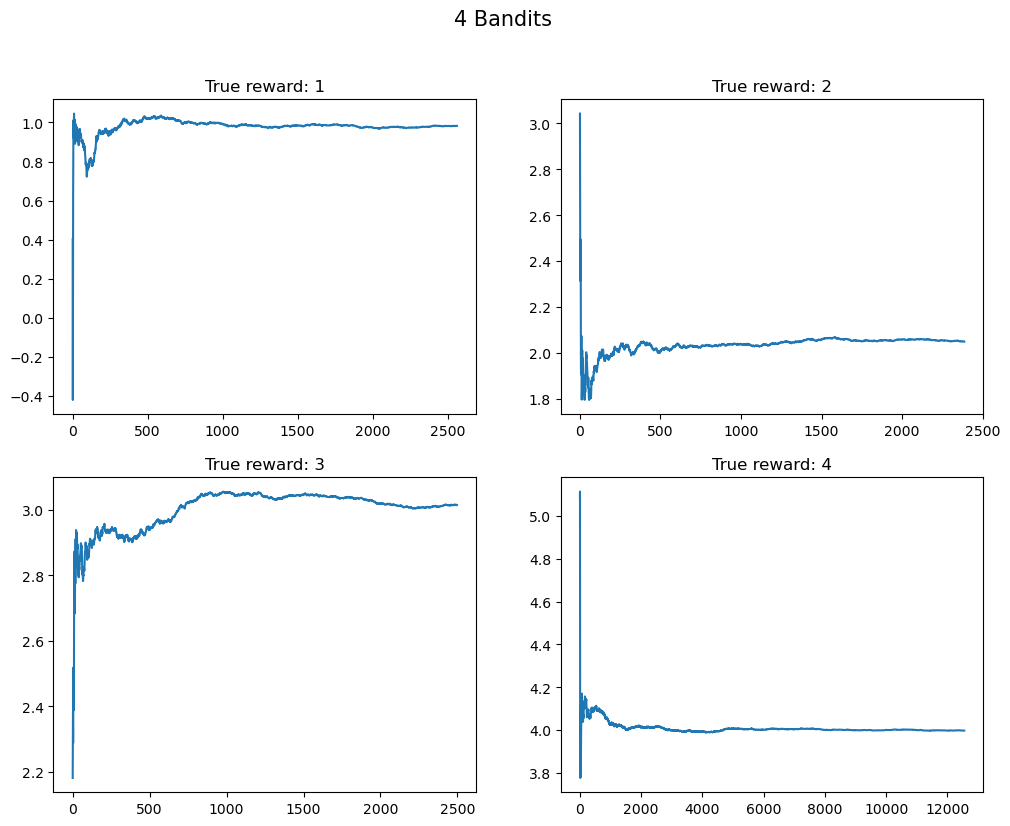

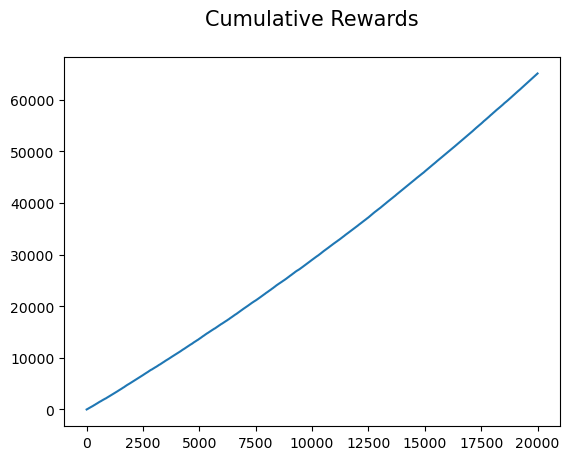

total reward : 65116.34499801535
cumulative reward : [2.18119569e+00 5.22346633e+00 7.71526132e+00 ... 6.51093539e+04
 6.51131625e+04 6.51163450e+04]


In [28]:
class EpsilonGreedyBandit(Bandit):
    """
    Defines an epsilon-greedy bandit. This bandit model includes attributes for storing the bandit's true reward and various methods for conducting experiments and updating its reward estimate.

    Attributes:
        reward (float): The true reward for the bandit.

    Methods:
        pull(): Retrieves a random value based on the bandit's true reward.
        update(x: float): Refines the bandit's reward estimate using a new sample.
        plot1(): Visualizes the learning progression of each bandit.
        experiment(bandit_rewards: list, num_trials: int, path_to_save: str, to_save: bool): Executes a set of trials on multiple bandits and optionally saves the results.
        report(path_to_save: str, to_save: bool): Compiles and displays a detailed report on the experiment's outcomes.
        create_data(): Prepares a dataframe to log experimental data.
        update_epsilon(): Adjusts the exploration rate dynamically across trials.
    """
    def __init__(self, reward):
        """
        Constructs a new instance of EpsilonGreedyBandit with specified initial true reward.

        Args:
            reward (float): The actual reward of the bandit.
        """
        self.reward = reward  
        self.reward_estimate = 0.  
        self.N = 0  
        self.learning_process = []  
        self.bandits = None  
        self.epsilon = 1  

    def pull(self):
        """
        Retrieves a reward value from a normal distribution centered around the bandit's true reward, with a standard deviation of 1.
        """
        return np.random.normal(self.reward, 1)  # Sample a reward

    def update(self, x):
        """
        Adjusts the estimated reward based on a newly obtained sample.

        Args:
            x (float): The newly obtained reward value.
        """
        self.N += 1  
        self.reward_estimate = ((self.N - 1) * self.reward_estimate + x) / self.N  
        self.learning_process.append(self.reward_estimate)  

    def __repr__(self):
        return f'A bandit with a true reward of {self.reward} and an estimated reward of {self.reward_estimate}'

    def plot1(self):
        """
        Generates plots for the learning curves of each bandit after an experiment.
        """
        if self.bandits is None:  
            raise Exception('Experiment must be run first.')
        fig, axs = plt.subplots(2, 2, figsize=(12, 9))  
        plt.suptitle('4 Bandits', size=15) 
        for index, bandit in enumerate(self.bandits):  
            x_index = 1 if index >= 2 else 0
            y_index = index % 2
            axs[x_index, y_index].plot(bandit.learning_process)
            axs[x_index, y_index].set_title(f'True reward: {bandit.reward}')
        plt.show()

    def experiment(self, bandit_rewards, num_trials, path_to_save='', to_save=False):
        """
        Conducts an experiment with specified rewards for each bandit and a given number of trials.

        Args:
            bandit_rewards (list): A list of true rewards for each bandit.
            num_trials (int): The total number of trials in the experiment.
            path_to_save (str): The file path to save experimental results.
            to_save (bool): Flag to determine if results should be saved.
        """
        if to_save:  
            self.create_data()
        self.bandits = [EpsilonGreedyBandit(reward) for reward in bandit_rewards]  
        self.rewards = np.zeros(num_trials)   
        for i in range(num_trials):  
            if np.random.random() < self.epsilon:  
                index = np.random.randint(len(self.bandits))
            else:
                index = np.argmax([b.reward_estimate for b in self.bandits])  
            selected_bandit = self.bandits[index]  
            x = selected_bandit.pull()  
            if to_save:  
                new_row = {'Bandit': index, 'Reward': x, 'Algorithm': selected_bandit.__class__.__name__}
                self.data = self.data.append(new_row, ignore_index=True)
            self.rewards[i] = x  
            selected_bandit.update(x)  
            self.update_epsilon(i, num_trials) 
        self.report(path_to_save, to_save)  
        return self.rewards

    def report(self, path_to_save, to_save=False):
        """
        Creates and displays a comprehensive report detailing the results of the experiment.

        Args:
            path_to_save (str): The file path for saving the experiment report.
            to_save (bool): Flag to decide if the report should be saved.
        """
        if self.bandits is None:  
            raise Exception('Experiment must be run first.')

        self.plot1()

        cumulative_rewards = np.cumsum(self.rewards)
        plt.plot(cumulative_rewards)
        plt.title('Cumulative Rewards\n', size=15)
        plt.show()

        if to_save:
            self.data.to_csv(path_to_save, index=False)

        cumulative_reward = cumulative_rewards[-1]
        print(f'total reward : {cumulative_reward}')
        print(f'cumulative reward : {cumulative_rewards}')

    def create_data(self):
        """
        Sets up a dataframe to store data from the experiment.
        """
        self.data = pd.DataFrame(columns=['Bandit', 'Reward', 'Algorithm']) 
        print('DataFrame initialized')

    def update_epsilon(self, current_trial, num_trials):
        """
        Dynamically updates the epsilon value based on the current trial number and the total number of trials.

        Args:
            current_trial (int): The current trial number.
            num_trials (int): The total number of trials in the experiment.
        """
        self.epsilon = 1 - (current_trial / num_trials)  # Epsilon decay rate 1/t
        
eps_rewards = EpsilonGreedyBandit(Bandit).experiment(bandit_rewards_list, num_trials, 'EpsGre.csv', to_save=True)



Data framework established


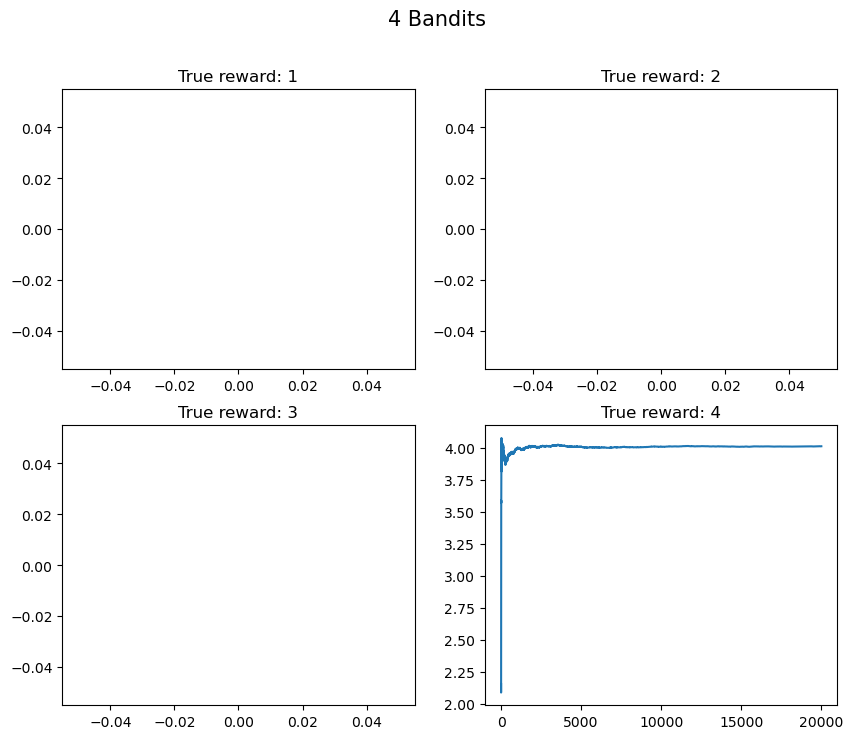

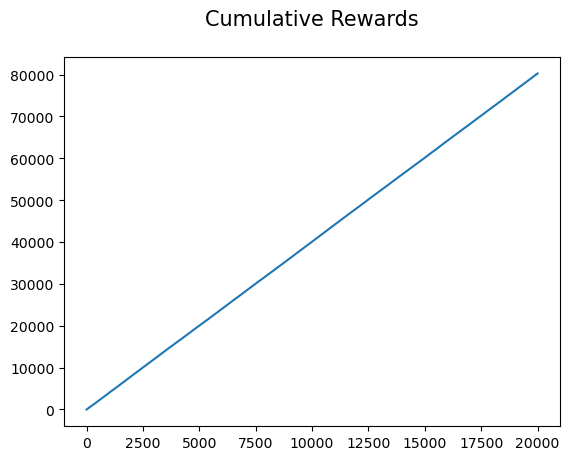

total reward: 80261.20793843285
cumulative reward : [4.31176167e+00 6.26784859e+00 1.01444442e+01 ... 8.02527520e+04
 8.02568733e+04 8.02612079e+04]


In [31]:
class Bandit:
    pass

class ThompsonSamplingBandit(Bandit):
    """
    Implements a bandit that utilizes Thompson Sampling strategy, detailing attributes for storing the actual reward and methods for handling the sampling process.

    Attributes:
        reward (float): The actual reward of the bandit.

    Methods:
        pull(): Retrieves a value from a distribution centered on the bandit's true reward.
        sample(): Generates a value based on the current reward estimation.
        update(x: float): Refines the bandit's reward estimate using new data.
        plot1(): Displays the learning trajectories of each bandit.
        experiment(bandit_rewards: list, num_trials: int, path_to_save: str, to_save: bool): Executes an experimental series with bandits, recording the number of trials and optionally saving the results.
        report(path_to_save: str, to_save: bool): Creates and presents a comprehensive analysis of the experiment.
        create_data(): Initializes a dataframe for logging experimental data.
    """
    def __init__(self, reward):
        """
        Creates an instance of ThompsonSamplingBandit with a specified reward.

        Args:
            reward (float): The true reward of the bandit.
        """
        self.reward = reward  
        self.m = 0  
        self.lambda_ = 1  
        self.tau = 1  
        self.N = 0  
        self.sum_x = 0  
        self.learning_process = []  

    def pull(self):
        """
        Draws a value from a normal distribution with the bandit's true reward as the mean and a unit variance.
        """
        return np.random.randn() / np.sqrt(self.tau) + self.reward

    def sample(self):
        """
        Estimates a reward value based on the current estimated parameters.
        """
        return np.random.randn() / np.sqrt(self.lambda_) + self.m

    def update(self, x):
        """
        Updates the reward estimation based on the value pulled in the latest interaction.

        Args:
            x (float): The latest reward value obtained.
        """
        self.lambda_ += self.tau  
        self.sum_x += x  
        self.m = (self.tau * self.sum_x) / self.lambda_  
        self.learning_process.append(self.m)  
        self.N += 1  

    def __repr__(self):
        return f'A bandit with a true reward of {self.reward} and an estimated reward of {self.m}'

    def plot1(self):
        """
        Generates subplots for the learning curves of each bandit post-experiment.
        """
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))
        plt.suptitle('4 Bandits', size=15)
        for index, bandit in enumerate(self.bandits):
            x_index = 1 if index >= 2 else 0
            y_index = index % 2
            axs[x_index, y_index].plot(bandit.learning_process)
            axs[x_index, y_index].set_title(f'True reward: {bandit.reward}')
        plt.show()

    def experiment(self, bandit_rewards, num_trials, path_to_save, to_save=False):
        """
        Organizes and runs a series of trials using specified bandit settings, saving data if required.

        Args:
            bandit_rewards (list): True rewards for the bandits.
            num_trials (int): Total trials to run.
            path_to_save (str): Where to save the results.
            to_save (bool): Flag to save the results or not.
        """
        if to_save:  
            self.create_data()
        self.bandits = [ThompsonSamplingBandit(reward) for reward in bandit_rewards]  
        self.rewards = np.zeros(num_trials)  
        self.regret = []
        for i in range(num_trials):
            index = np.argmax([b.sample() for b in self.bandits])  
            selected_bandit = self.bandits[index]
            x = selected_bandit.pull()
            if to_save:
                new_row = {'Bandit': index, 'Reward': x, 'Algorithm': selected_bandit.__class__.__name__}
                self.data = self.data.append(new_row, ignore_index=True)
            self.rewards[i] = x
            self.regret.append(selected_bandit.reward - x)
            selected_bandit.update(x)
        self.report(path_to_save, to_save)
        return self.rewards

    def report(self, path_to_save, to_save=False):
        """
        Produces and displays a detailed report from the experiment, showing cumulative results.

        Args:
            path_to_save (str): Path for saving the experiment's results.
            to_save (bool): Indicates if results should be saved.
        """
        if self.bandits is None:
            raise Exception('Experiment must be conducted first')
        
        self.plot1()

        cumulative_rewards = np.cumsum(self.rewards)
        plt.plot(cumulative_rewards)
        plt.title('Cumulative Rewards\n', size=15)
        plt.show()

        if to_save:
            self.data.to_csv(path_to_save, index=False)

        cumulative_reward = cumulative_rewards[-1]
        print(f'total reward: {cumulative_reward}')
        print(f'cumulative reward : {cumulative_rewards}')

    def create_data(self):
        """
        Sets up a new dataframe to record the details of each trial.
        """
        self.data = pd.DataFrame(columns=['Bandit', 'Reward', 'Algorithm'])
        print('Data framework established')

thompson_rewards = ThompsonSamplingBandit(Bandit).experiment(bandit_rewards_list, num_trials, 'ThmpSampl.csv', to_save=True)

### Comparison of Epsilon and Thompson rewards

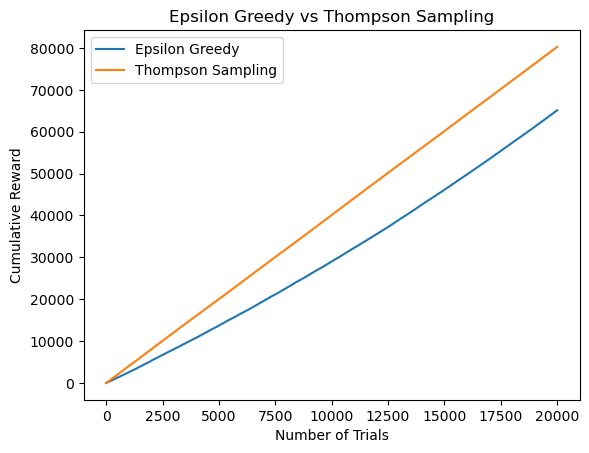

In [35]:
def compare(epsilon_rewards, thompson_rewards, num_trials):
    """
    A function for visualizing and comparing the rewards obtained using Epsilon-Greedy and Thompson Sampling algorithms.

    Args:
        epsilon_rewards (list): Rewards obtained using the Epsilon-Greedy algorithm.
        thompson_rewards (list): Rewards obtained using the Thompson Sampling algorithm.
        num_trials (int): The total number of trials or iterations.
    """
    plt.plot(np.arange(num_trials), np.cumsum(epsilon_rewards), label='Epsilon Greedy')
    plt.plot(np.arange(num_trials), np.cumsum(thompson_rewards), label='Thompson Sampling')
    plt.xlabel('Number of Trials')
    plt.ylabel('Cumulative Reward')
    plt.title('Epsilon Greedy vs Thompson Sampling')
    plt.legend()
    plt.show()
    
compare(eps_rewards, thompson_rewards, num_trials)